# Timon Spichtinger Machine Learning 2 Modularbeit

In [1]:
from torchvision.datasets import EMNIST
from torchvision import transforms
from torch.utils.data import DataLoader, Subset
import torch
import importlib
from Datensatz import get_emnist_test_train, show_random_samples
import torch.nn as nn

## 1.1 Datensatz

Train und Testdaten werden aus Emnist-Datensatz geladen. Falls es zuwenige gibt werden die restlichen Augmentiert

In [2]:
X_train, y_train, X_test, y_test,class_list = get_emnist_test_train()

Ziel-ASCII: [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]
Anzahl Zielklassen: 36
⚠️ Klasse B: nur 3878 echte Bilder – augmentiere 2122 zusätzlich.
⚠️ Klasse D: nur 4562 echte Bilder – augmentiere 1438 zusätzlich.
⚠️ Klasse E: nur 4934 echte Bilder – augmentiere 1066 zusätzlich.
⚠️ Klasse G: nur 2517 echte Bilder – augmentiere 3483 zusätzlich.
⚠️ Klasse H: nur 3152 echte Bilder – augmentiere 2848 zusätzlich.
⚠️ Klasse J: nur 3762 echte Bilder – augmentiere 2238 zusätzlich.
⚠️ Klasse K: nur 2468 echte Bilder – augmentiere 3532 zusätzlich.
⚠️ Klasse L: nur 5076 echte Bilder – augmentiere 924 zusätzlich.
⚠️ Klasse b: nur 5159 echte Bilder – augmentiere 841 zusätzlich.
⚠️ Klasse c: nur 2854 echte Bilder – augmentiere 3146 zusätzlich.
⚠️ Klasse f: nur 2561 echte Bilder – augmentiere 3439 zusätzlich.
⚠️ Klasse g: nur 3687 echte Bilder – augmentiere 2313 zusätzlich.
⚠️ Klasse i: nur 272

Stichprobe, ob der Datensatz passt

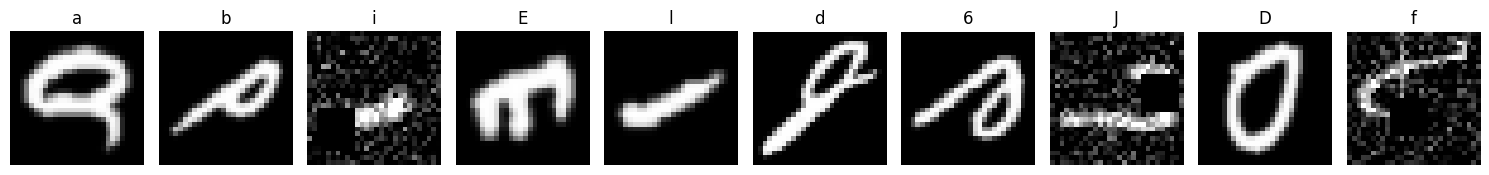

In [3]:

show_random_samples(X_test, y_test, class_list, n=10)

In [4]:


import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

import optuna
from Klassifikator import get_objective, ResNet18, EarlyStopping


/home/timon/ML2Modularbeit/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:

# Gerät
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)



In [6]:
# -----------------------------
# Optuna-Studie starten
# -----------------------------
study = optuna.create_study(direction="maximize")
study.optimize(get_objective(
          train_dataset=train_dataset,
          test_dataset=test_dataset,
          device=device,
          model=ResNet18(num_classes=len(class_list)).to(device),
          early_stopping=EarlyStopping()), n_trials=20)

# Beste Parameter anzeigen
print("🎯 Beste Hyperparameter:")
for k, v in study.best_params.items():
    print(f"{k}: {v}")



[I 2025-06-25 15:56:41,527] A new study created in memory with name: no-name-12a92325-a73e-4eb7-a69f-b33ffe94019b


⛔ Early Stopping in Epoch 10


[I 2025-06-25 16:00:11,424] Trial 0 finished with value: 0.8406666666666667 and parameters: {'batch_size': 144, 'lr': 0.0001879827469348002, 'momentum': 0.9182795270675506, 'step_size': 4, 'gamma': 0.5930222645516339}. Best is trial 0 with value: 0.8406666666666667.


⛔ Early Stopping in Epoch 1


[I 2025-06-25 16:00:34,719] Trial 1 finished with value: 0.8263055555555555 and parameters: {'batch_size': 144, 'lr': 0.04575500725903442, 'momentum': 0.6353861516340995, 'step_size': 3, 'gamma': 0.5924947539542894}. Best is trial 0 with value: 0.8406666666666667.


⛔ Early Stopping in Epoch 1


[I 2025-06-25 16:01:15,051] Trial 2 finished with value: 0.8595555555555555 and parameters: {'batch_size': 64, 'lr': 0.0010561954819674046, 'momentum': 0.7150425825384195, 'step_size': 3, 'gamma': 0.8953002251411555}. Best is trial 2 with value: 0.8595555555555555.


⛔ Early Stopping in Epoch 1


[I 2025-06-25 16:01:57,857] Trial 3 finished with value: 0.8609722222222222 and parameters: {'batch_size': 64, 'lr': 0.0007928006482039819, 'momentum': 0.761051199227593, 'step_size': 5, 'gamma': 0.7440588493248892}. Best is trial 3 with value: 0.8609722222222222.


⛔ Early Stopping in Epoch 1


[I 2025-06-25 16:02:14,381] Trial 4 finished with value: 0.8418055555555556 and parameters: {'batch_size': 256, 'lr': 0.05488985809412714, 'momentum': 0.6917746278551415, 'step_size': 3, 'gamma': 0.6780932729183522}. Best is trial 3 with value: 0.8609722222222222.


⛔ Early Stopping in Epoch 1


[I 2025-06-25 16:02:57,051] Trial 5 finished with value: 0.8481944444444445 and parameters: {'batch_size': 64, 'lr': 0.03131022817496556, 'momentum': 0.7037384001377636, 'step_size': 3, 'gamma': 0.5385603481946085}. Best is trial 3 with value: 0.8609722222222222.


⛔ Early Stopping in Epoch 1


[I 2025-06-25 16:03:19,287] Trial 6 finished with value: 0.8629166666666667 and parameters: {'batch_size': 128, 'lr': 0.00023822725150253043, 'momentum': 0.8678802252764058, 'step_size': 2, 'gamma': 0.6611452352003717}. Best is trial 6 with value: 0.8629166666666667.
[I 2025-06-25 16:03:37,538] Trial 7 pruned. 


⛔ Early Stopping in Epoch 1


[I 2025-06-25 16:03:58,927] Trial 8 finished with value: 0.8672777777777778 and parameters: {'batch_size': 144, 'lr': 0.003445452218801487, 'momentum': 0.637777667880188, 'step_size': 4, 'gamma': 0.8831948335667057}. Best is trial 8 with value: 0.8672777777777778.


⛔ Early Stopping in Epoch 1


[I 2025-06-25 16:04:41,395] Trial 9 finished with value: 0.8653888888888889 and parameters: {'batch_size': 64, 'lr': 0.013400249639957158, 'momentum': 0.7469014240879965, 'step_size': 5, 'gamma': 0.714551566648893}. Best is trial 8 with value: 0.8672777777777778.


⛔ Early Stopping in Epoch 1


[I 2025-06-25 16:05:03,140] Trial 10 finished with value: 0.8701111111111111 and parameters: {'batch_size': 144, 'lr': 0.0066451697724240295, 'momentum': 0.6301153461692316, 'step_size': 4, 'gamma': 0.9427425684623874}. Best is trial 10 with value: 0.8701111111111111.


⛔ Early Stopping in Epoch 1


[I 2025-06-25 16:05:24,564] Trial 11 finished with value: 0.8718888888888889 and parameters: {'batch_size': 144, 'lr': 0.005352996818622298, 'momentum': 0.6028670530295857, 'step_size': 4, 'gamma': 0.9452229459254067}. Best is trial 11 with value: 0.8718888888888889.


⛔ Early Stopping in Epoch 1


[I 2025-06-25 16:05:46,092] Trial 12 finished with value: 0.8705277777777778 and parameters: {'batch_size': 144, 'lr': 0.008104760023572506, 'momentum': 0.6117809628558116, 'step_size': 4, 'gamma': 0.9481057674324644}. Best is trial 11 with value: 0.8718888888888889.


⛔ Early Stopping in Epoch 1


[I 2025-06-25 16:06:09,230] Trial 13 finished with value: 0.8680277777777777 and parameters: {'batch_size': 144, 'lr': 0.010873985904921526, 'momentum': 0.8291979873753915, 'step_size': 5, 'gamma': 0.8224764595090176}. Best is trial 11 with value: 0.8718888888888889.


⛔ Early Stopping in Epoch 1


[I 2025-06-25 16:06:31,930] Trial 14 finished with value: 0.8708333333333333 and parameters: {'batch_size': 128, 'lr': 0.001660353460609512, 'momentum': 0.6002181632159868, 'step_size': 4, 'gamma': 0.8161083621669132}. Best is trial 11 with value: 0.8718888888888889.


⛔ Early Stopping in Epoch 1


[I 2025-06-25 16:06:54,110] Trial 15 finished with value: 0.8713888888888889 and parameters: {'batch_size': 128, 'lr': 0.0011533880024199184, 'momentum': 0.6708945460937437, 'step_size': 2, 'gamma': 0.8280769103129736}. Best is trial 11 with value: 0.8718888888888889.


⛔ Early Stopping in Epoch 1


[I 2025-06-25 16:07:16,973] Trial 16 finished with value: 0.8716111111111111 and parameters: {'batch_size': 128, 'lr': 0.0006466795998814028, 'momentum': 0.8025234369365254, 'step_size': 2, 'gamma': 0.8158439748178343}. Best is trial 11 with value: 0.8718888888888889.


⛔ Early Stopping in Epoch 1


[I 2025-06-25 16:07:41,087] Trial 17 finished with value: 0.8707222222222222 and parameters: {'batch_size': 128, 'lr': 0.0003759115818159775, 'momentum': 0.8116520711665514, 'step_size': 2, 'gamma': 0.7803355888522333}. Best is trial 11 with value: 0.8718888888888889.


⛔ Early Stopping in Epoch 1


[I 2025-06-25 16:08:03,900] Trial 18 finished with value: 0.8716388888888889 and parameters: {'batch_size': 128, 'lr': 0.00010171015853154778, 'momentum': 0.8069962606601048, 'step_size': 2, 'gamma': 0.8784580341922786}. Best is trial 11 with value: 0.8718888888888889.


⛔ Early Stopping in Epoch 1


[I 2025-06-25 16:08:20,474] Trial 19 finished with value: 0.87175 and parameters: {'batch_size': 256, 'lr': 0.00010015031150939988, 'momentum': 0.9444763825299476, 'step_size': 5, 'gamma': 0.886571452392009}. Best is trial 11 with value: 0.8718888888888889.


🎯 Beste Hyperparameter:
batch_size: 144
lr: 0.005352996818622298
momentum: 0.6028670530295857
step_size: 4
gamma: 0.9452229459254067


In [9]:
# -----------------------------
# Parameter fü Finales Training 
# -----------------------------
best_params = study.best_params
train_loader = DataLoader(train_dataset, batch_size=best_params["batch_size"], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=best_params["batch_size"], shuffle=False)

model = ResNet18(num_classes=len(class_list)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=best_params["lr"], momentum=best_params["momentum"])
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=best_params["step_size"], gamma=best_params["gamma"])





In [10]:
from Training import _1_2training

_1_2training(train_loader,test_loader,model,device,criterion,optimizer,scheduler,30)


🔁 Epoch 1, Step 200/1250: Batch Loss = 0.4859
🔁 Epoch 1, Step 400/1250: Batch Loss = 0.5836
🔁 Epoch 1, Step 600/1250: Batch Loss = 0.4906
🔁 Epoch 1, Step 800/1250: Batch Loss = 0.5143
🔁 Epoch 1, Step 1000/1250: Batch Loss = 0.3809
🔁 Epoch 1, Step 1200/1250: Batch Loss = 0.4426
📊 Epoch 1: Train Acc = 79.28%, Val Acc = 83.30%, Val Loss = 0.4224, LR = [0.005352996818622298]


TypeError: EarlyStopping.__call__() missing 1 required positional argument: 'model'

In [ ]:
# Modell speichern
torch.save(model.state_dict(), './resnet18_best_hyperparams.pth')
print("✅ Modell gespeichert.")

In [ ]:

from Evaluation import evaluate_model



# Beispielaufruf
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Wähle GPU, wenn verfügbar

# Modell auf das Gerät (GPU/CPU) verschieben
model = model.to(device)

# Jetzt den Evaluierungscode aufrufen
evaluate_model(model, test_loader, device, class_list)


Gesamtgenauigkeit des Netzwerks: 83.92 %
Genauigkeit für Klasse 0: 97.90 %
Genauigkeit für Klasse 1: 71.70 %
Genauigkeit für Klasse 2: 98.20 %
Genauigkeit für Klasse 3: 98.20 %
Genauigkeit für Klasse 4: 97.00 %
Genauigkeit für Klasse 5: 98.40 %
Genauigkeit für Klasse 6: 93.80 %
Genauigkeit für Klasse 7: 98.80 %
Genauigkeit für Klasse 8: 97.80 %
Genauigkeit für Klasse 9: 93.50 %
Genauigkeit für Klasse A: 98.40 %
Genauigkeit für Klasse B: 91.20 %
Genauigkeit für Klasse C: 91.60 %
Genauigkeit für Klasse D: 90.10 %
Genauigkeit für Klasse E: 93.90 %
Genauigkeit für Klasse F: 87.40 %
Genauigkeit für Klasse G: 89.50 %
Genauigkeit für Klasse H: 94.50 %
Genauigkeit für Klasse I: 52.10 %
Genauigkeit für Klasse J: 82.30 %
Genauigkeit für Klasse K: 78.40 %
Genauigkeit für Klasse L: 93.30 %
Genauigkeit für Klasse M: 58.20 %
Genauigkeit für Klasse a: 94.50 %
Genauigkeit für Klasse b: 89.00 %
Genauigkeit für Klasse c: 53.90 %
Genauigkeit für Klasse d: 96.80 %
Genauigkeit für Klasse e: 97.20 %
Genauig

83.91944444444445

# 1.3

In [ ]:
def create_type_labeled_dataloaders(X_train, y_train, X_test, y_test, class_list, batch_size):
    def get_type_labels(y_tensor):
        type_labels = []
        for label in y_tensor:
            char = str(class_list[int(label)])  # Ensure it's a string
            
            if char.isdigit():
                type_labels.append(0)  # Ziffer
            elif char.isupper():
                type_labels.append(1)  # Großbuchstabe
            else:
                type_labels.append(2)  # Kleinbuchstabe
        return torch.tensor(type_labels, dtype=torch.long)

    y_train_type = get_type_labels(y_train)
    y_test_type = get_type_labels(y_test)

    train_dataset = TensorDataset(X_train, y_train, y_train_type)
    test_dataset = TensorDataset(X_test, y_test, y_test_type)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader


In [ ]:
train_loader, test_loader = create_type_labeled_dataloaders(
    X_train, y_train, X_test, y_test,
    class_list=class_list,
    batch_size=best_params["batch_size"]
)


In [ ]:
def get_type_label_tensor(label_tensor):
    class_list = list('0123456789ABCDEFGHIJKLMabcdefghijklm')
    label_to_class = {i: c for i, c in enumerate(class_list)}
    
    type_labels = []
    for label in label_tensor:
        char = label_to_class[int(label)]
        if char.isdigit():
            type_labels.append(0)
        elif char.isupper():
            type_labels.append(1)
        else:
            type_labels.append(2)
    return torch.tensor(type_labels, dtype=torch.long)

In [ ]:
y_train_type = get_type_label_tensor(y_train)
y_test_type = get_type_label_tensor(y_test)


In [ ]:
train_dataset = TensorDataset(X_train, y_train, y_train_type)
test_dataset = TensorDataset(X_test, y_test, y_test_type)


In [ ]:
# Beispielhafte Klasse-zu-Typ-Zuordnung: 0 = Groß, 1 = Klein, 2 = Ziffer
def get_type_label_tensor(y):
    type_labels = []
    for label in y:
        char = class_list[label]
        if char.isdigit():
            type_labels.append(2)
        elif char.isupper():
            type_labels.append(0)
        else:
            type_labels.append(1)
    return torch.tensor(type_labels)

In [ ]:
class TypeClassifier(nn.Module):
    def __init__(self):
        super(TypeClassifier, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 3)
        )

    def forward(self, x):
        x = self.conv(x)
        return F.softmax(self.fc(x), dim=1)



In [ ]:
class ModularClassifier(nn.Module):
    def __init__(self, tm1, tm2, class_type_map):
        super(ModularClassifier, self).__init__()
        self.tm1 = tm1
        self.tm2 = tm2
        self.class_type_map = torch.tensor(class_type_map, dtype=torch.long)  # Länge 36

    def forward(self, x):
        out_cls = self.tm1(x)  # shape (B, 36)
        out_type = self.tm2(x)  # shape (B, 3)

        type_probs = out_type[:, self.class_type_map.to(x.device)]  # shape (B, 36)
        final_out = out_cls * type_probs  # Elementweise Multiplikation

        return final_out, out_cls, out_type


In [ ]:
# class_list = ['0', '1', ..., 'a', 'b', ...]
class_type_map = []
for c in class_list:
    if c.isdigit():
        class_type_map.append(2)
    elif c.isupper():
        class_type_map.append(0)
    else:
        class_type_map.append(1)



AttributeError: 'int' object has no attribute 'isdigit'

In [ ]:
tm1 = ResNet18(num_classes=len(class_list))

modular_model = ModularClassifier(
    tm1,
    tm2=TypeClassifier(),
    class_type_map=class_type_map
).to(device)

criterion_cls = nn.CrossEntropyLoss()
criterion_type = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modular_model.parameters(), lr=1e-3)


In [ ]:
for epoch in range(30):
    modular_model.train()
    total_loss = 0.0  # ✅ richtig initialisieren

    for images, labels_cls, labels_type in train_loader:
        images = images.to(device)
        labels_cls = labels_cls.to(device)
        labels_type = labels_type.to(device)

        final_out, out_cls, out_type = modular_model(images)

        loss_cls = criterion_cls(out_cls, labels_cls)
        loss_type = criterion_type(out_type, labels_type)
        loss = loss_cls + 0.5 * loss_type

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()  # ✅ jetzt ist total_loss eine float

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")




RuntimeError: The size of tensor a (36) must match the size of tensor b (0) at non-singleton dimension 1

[]

'4'